## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X  = np.array(X)
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [4]:
from sklearn.cluster import KMeans
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0)

In [5]:
y_kmeans = kmeans.fit_predict(X)

In [6]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [7]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [8]:
df['cluster'] = y_kmeans
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


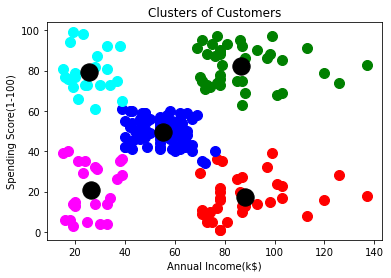

In [9]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)');

In [10]:
X[y_kmeans == 0, 0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

In [11]:
X[y_kmeans == 0, 1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18])

In [12]:
p = df[df['cluster'] == 3]
p = p[['Genre','Spending Score (1-100)']]
p.groupby(by=["Genre"]).mean()

,Spending Score (1-100)
Genre,
Female,80.538462
Male,77.666667


In [13]:
p = df[df['cluster'] == 3]
p = p[['Age','Spending Score (1-100)']]
p.groupby(by=["Age"]).mean()

,Spending Score (1-100)
Age,
18,92.000000
20,70.500000
21,78.333333
22,77.500000
23,86.000000
24,78.000000
25,73.000000
29,82.000000
30,72.500000


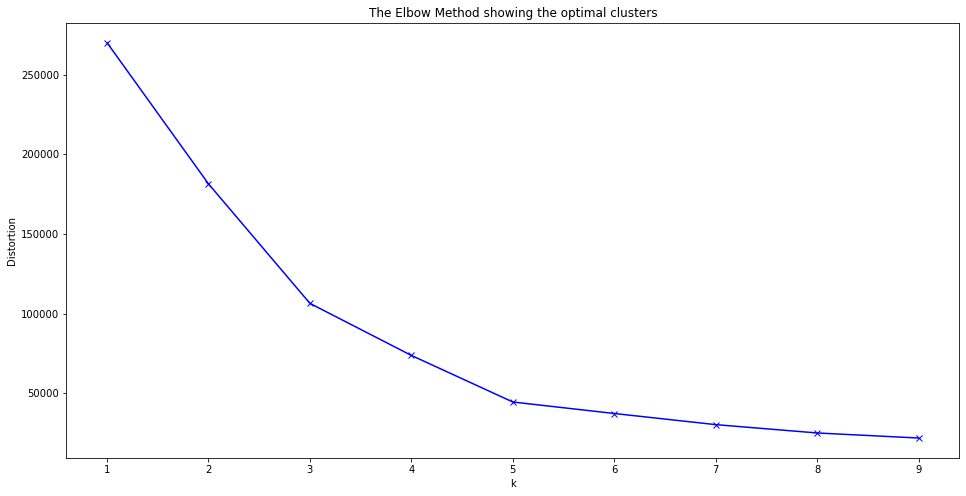

In [14]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_) 
    #inertia_ >> Sum of squared distances of samples to their closest cluster center.
    
# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-') # " bx- means blue color, x marker, solid line style
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [15]:
kmeans_model = KMeans(n_clusters=5)
kmeans_predict = kmeans_model.fit_predict(X)

# Iris Dataset

In [16]:
iris = pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
iris['Species'] = iris.Species.str.replace('Iris-' , '')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [18]:
# To do the clustering we only need four features (sepal length, sepal width, petal length, and petal width)
x = iris.iloc[:, [1,2,3,4]] # : means all rows, [1,2,3,4] refer to the columns 
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
x  = np.array(x)

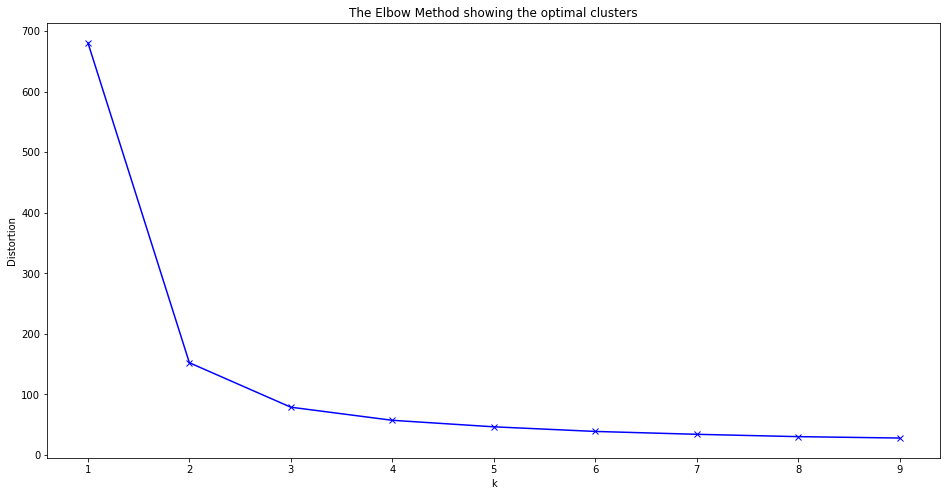

In [20]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_) 
    #inertia_ >> Sum of squared distances of samples to their closest cluster center.
    
# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-') # " bx- means blue color, x marker, solid line style
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [21]:
kmeans_model = KMeans(n_clusters=3)
kmeans_predict = kmeans_model.fit_predict(x)

In [22]:
iris['Cluster'] = kmeans_predict
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,1
147,148,6.5,3.0,5.2,2.0,virginica,2
148,149,6.2,3.4,5.4,2.3,virginica,2


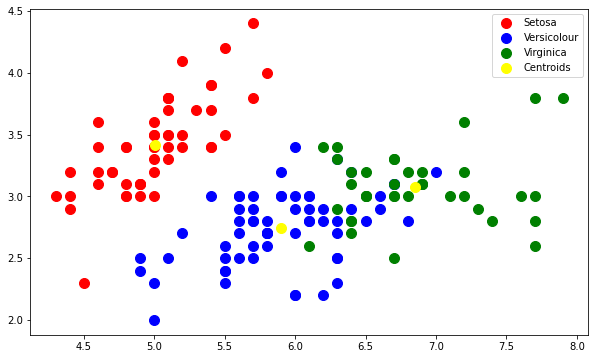

In [23]:
# Visualising the clusters
plt.figure(figsize=(10,6))
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Setosa')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Versicolour')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', 
            label = 'Centroids')
plt.legend();

In [24]:
x[kmeans_predict == 0, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [25]:
x[kmeans_predict == 0, 1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

# Resources:
- https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp
- https://jerichosiahaya.github.io/blog/k-means-clustering-with-python-beginner-tutorial/
- https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/